# Layered-tree-draw alghorithm

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [44]:
!git clone https://github.com/RostislavKorst/dataviz_mipt_hw.git

Cloning into 'dataviz_mipt_hw'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [45]:
test_tree = nx.read_graphml("dataviz_mipt_hw/tree-42n.xml")

# Сначала построим алгоритм без сдвига на константу c

In [53]:
def computing_positions(graph) -> dict:
    # Сначала нужно найти вершину дерева
    root = [n for n, d in test_tree.in_degree() if d==0][0]

    pos_dict = dict()
    count = [0]
    d = 0

    def left(node):
        neighbors = list(graph.neighbors(node))
        if neighbors:
            return neighbors[0]

    def right(node):
        neighbors = list(graph.neighbors(node))
        if len(neighbors) > 1:
            return neighbors[1]

    def mark(node, depth):
        count[:] = [count[0] + 1]
        x = count[0]
        y = -depth
        pos_dict[node] = np.array([x, y])

    def visit(v, depth):
        if v:
            visit(left(v), depth + 1)
            mark(v, depth)
            visit(right(v), depth + 1)
    
    visit(root, d)

    return pos_dict

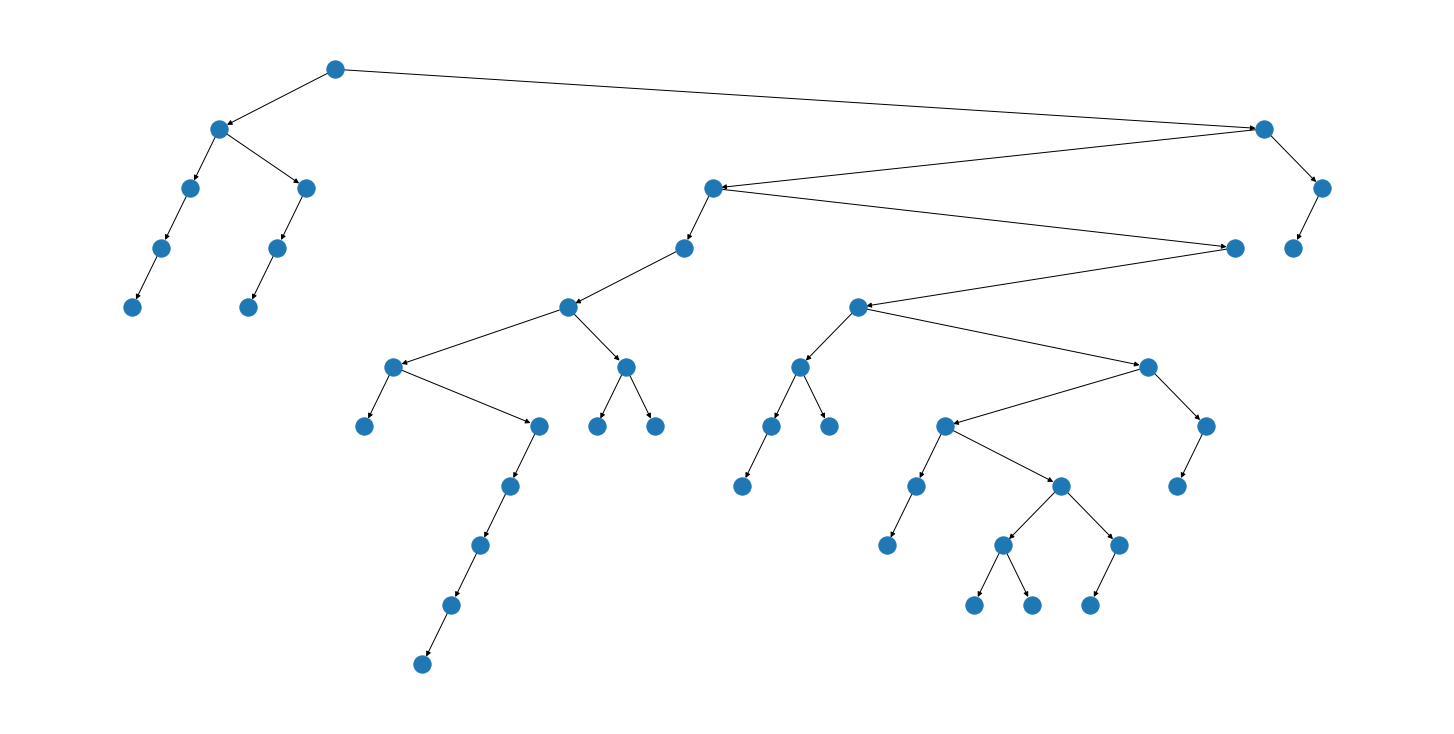

In [54]:
T = test_tree
pos=computing_positions(T)

plt.figure(figsize=(20, 10))
nx.draw(T, pos)
plt.show()

# Теперь будем делать сдвиг для всех поддеревьев

In [55]:
def computing_positions(graph) -> dict:
    # Сначала нужно найти вершину дерева
    root = [n for n, d in test_tree.in_degree() if d==0][0]

    pos_dict = dict()
    count = [0]
    d = 0

    right_contour = list()
    left_contour = list()

    def left(node):
        neighbors = list(graph.neighbors(node))
        if neighbors:
            return neighbors[0]

    def right(node):
        neighbors = list(graph.neighbors(node))
        if len(neighbors) > 1:
            return neighbors[1]

    def mark(node, depth):
        count[:] = [count[0] + 1]
        x = count[0]
        y = -depth
        pos_dict[node] = np.array([x, y])

    def visit(v, depth):
        if v:
            visit(left(v), depth + 1)
            mark(v, depth)
            visit(right(v), depth + 1)
    
    visit(root, d)

    def right2(node):
        neighbors = list(graph.neighbors(node))
        if len(neighbors) > 1:
            return neighbors[1]
        if len(neighbors) == 1:
            return neighbors[0]
    
    def shift(node):
        center_x = pos_dict[node][0]
        def compute_contour_edge_of_subtree(node, edge='right'):
            if not node: 
                return
            array_of_x_coordinates = list()
            current_node = node
            current_node_x = pos_dict[current_node][0]
            array_of_x_coordinates.append(current_node_x)
            edge_map = {'right': right2,
                        'left': left}
            direction = edge_map.get(edge)
            while direction(current_node):
                current_node = direction(current_node)
                current_node_x = pos_dict[current_node][0]
                array_of_x_coordinates.append(current_node_x)
            return array_of_x_coordinates

        right_contour = compute_contour_edge_of_subtree(right(node), edge='left')
        left_contour = compute_contour_edge_of_subtree(left(node), edge='right')
        dif = list()
        if not right_contour or not left_contour:
            return
        for i in range(min(len(left_contour), len(right_contour))):
            dif.append(right_contour[i] - left_contour[i] + 1)
        c = min(dif)

        def mark_with_shift(node, depth, how):
            x, y = pos_dict[node]
            if how == 'shift_to_left':
                x = x - c + 3
            elif how == 'shift_to_right':
                x = x + c - 3
            y = y
            pos_dict[node] = np.array([x, y])

        def visit_with_shift(v, depth, how):
            if v:
                visit_with_shift(left(v), depth + 1, how)
                mark_with_shift(v, depth, how)
                visit_with_shift(right(v), depth + 1, how)
        
        left_node_x = pos_dict[left(node)][0]
        right_node_x = pos_dict[right(node)][0]
        if abs(center_x - left_node_x) < abs(center_x - right_node_x):
            visit_with_shift(right(node), d + 1, 'shift_to_left')
        else:
            visit_with_shift(left(node), d + 1, 'shift_to_right')

    def shift_visit(v, depth):
        if v:
            shift_visit(left(v), depth + 1)
            shift_visit(right(v), depth + 1)
            shift(v)

    shift_visit(root, d)

    # Сдвинем корень на середину между его левым и правым соседом
    right_root_neighbor = right(root)
    left_root_neighbor = left(root)
    
    pos_dict[root][0] = (pos_dict[left_root_neighbor][0] + 
                      pos_dict[right_root_neighbor][0]) / 2

    return pos_dict

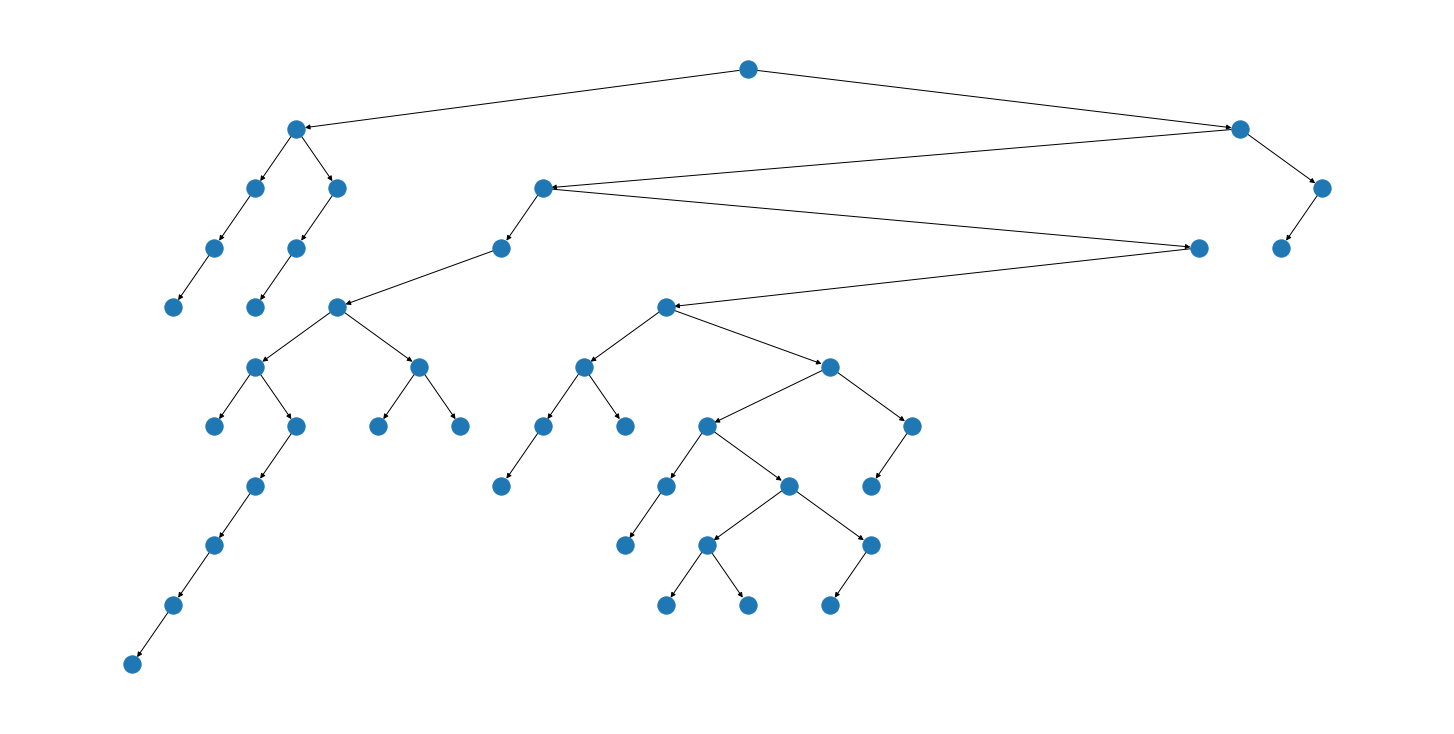

In [56]:
T = test_tree
pos=computing_positions(T)

plt.figure(figsize=(20, 10))
nx.draw(T, pos)
plt.show()

In [52]:
[n for n, d in test_tree.in_degree() if d==0]

['n0']